In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV,Ridge,Lasso
import statsmodels.api as sm
from sklearn import metrics
!pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Get the data ready to work on

In [ ]:
df=pd.read_csv('results_r_copy.csv')

Data exploratory and cleaning

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df

,Season,DateTime,home_team_name,away_team_name,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2017-18,2017-08-11T00:00:00Z,Arsenal,Leicester,4,3,H,2,2,D,...,10,3,9,4,9,12,0,1,0,0
1,2017-18,2017-08-12T00:00:00Z,Brighton,Man City,0,2,A,0,0,D,...,2,4,3,10,6,9,0,2,0,0
2,2017-18,2017-08-12T00:00:00Z,Chelsea,Burnley,2,3,A,0,3,A,...,6,5,8,5,16,11,3,3,2,0
3,2017-18,2017-08-12T00:00:00Z,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,4,6,12,9,7,19,1,3,0,0
4,2017-18,2017-08-12T00:00:00Z,Everton,Stoke,1,0,H,1,0,H,...,4,1,6,7,13,10,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0,1,A,...,8,5,9,3,12,14,2,3,0,0
1825,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0,0,D,...,7,1,4,6,2,6,0,1,0,0
1826,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2,0,H,...,3,3,3,4,11,12,1,1,0,0
1827,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1,0,H,...,6,4,6,7,12,10,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          1829 non-null   object
 1   DateTime        1829 non-null   object
 2   home_team_name  1829 non-null   object
 3   away_team_name  1829 non-null   object
 4   FTHG            1829 non-null   int64 
 5   FTAG            1829 non-null   int64 
 6   FTR             1829 non-null   object
 7   HTHG            1829 non-null   int64 
 8   HTAG            1829 non-null   int64 
 9   HTR             1829 non-null   object
 10  HS              1829 non-null   int64 
 11  AS              1829 non-null   int64 
 12  HST             1829 non-null   int64 
 13  AST             1829 non-null   int64 
 14  HC              1829 non-null   int64 
 15  AC              1829 non-null   int64 
 16  HF              1829 non-null   int64 
 17  AF              1829 non-null   int64 
 18  HY      

In [ ]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,1.490979,1.248223,0.665391,0.564243,13.522143,11.272827,4.631493,3.975943,5.672499,4.703663,10.459814,10.531985,1.537452,1.642428,0.049754,0.065610
std,1.311267,1.211114,0.841101,0.779841,5.641959,4.980974,2.625371,2.393799,3.034523,2.754287,3.437811,3.547534,1.223110,1.220751,0.222469,0.256349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,3.000000,3.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,5.000000,4.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,8.000000,6.000000,13.000000,13.000000,2.000000,2.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,36.000000,30.000000,15.000000,15.000000,18.000000,16.000000,23.000000,26.000000,6.000000,7.000000,2.000000,2.000000


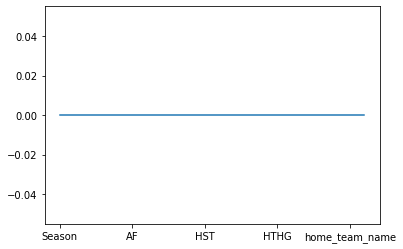

In [ ]:
missing_datas_percent=df.isna().sum().sort_values(ascending=False)/len(df)
missing_datas_percent.plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


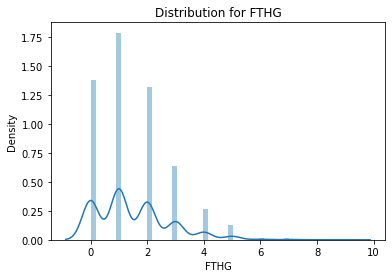

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


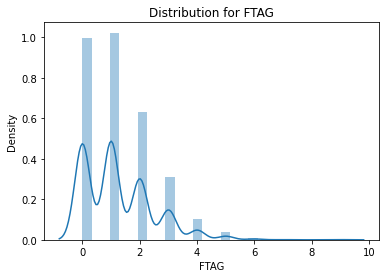

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


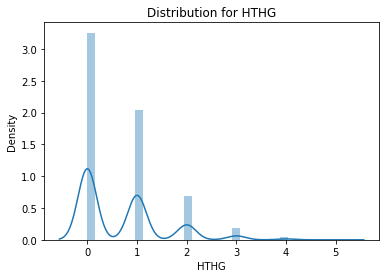

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


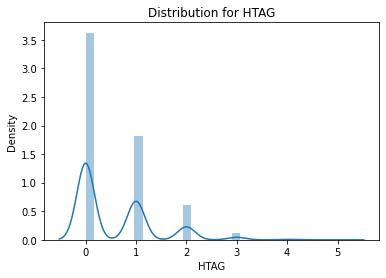

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


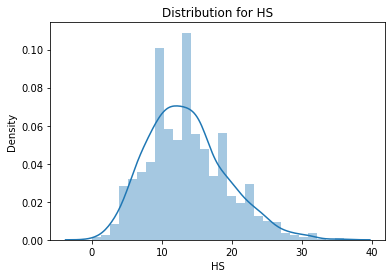

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


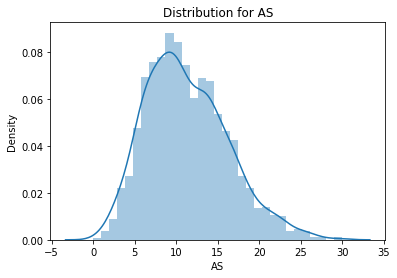

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


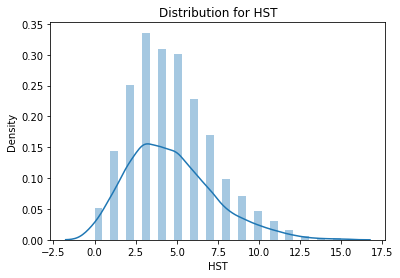

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


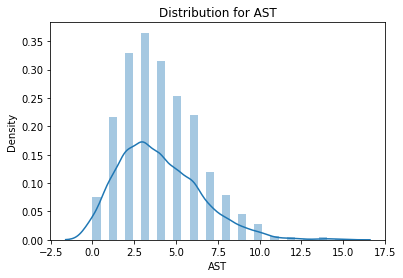

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


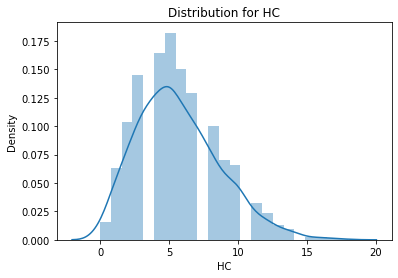

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


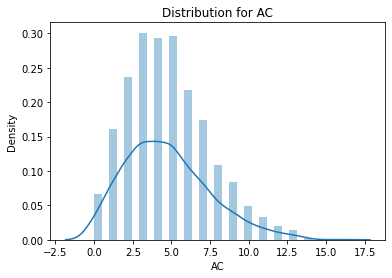

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


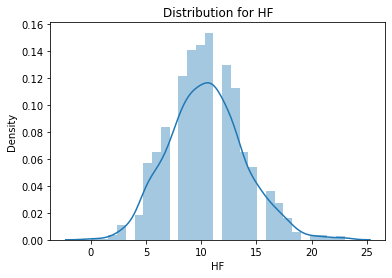

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


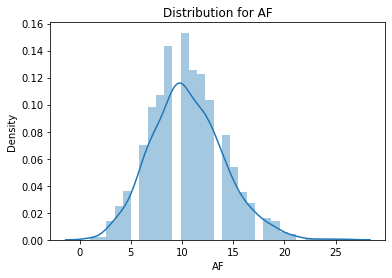

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


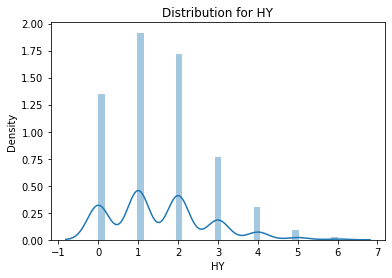

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


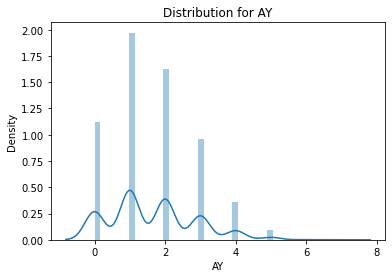

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


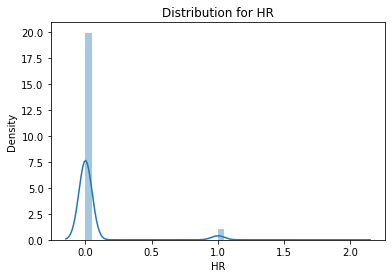

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


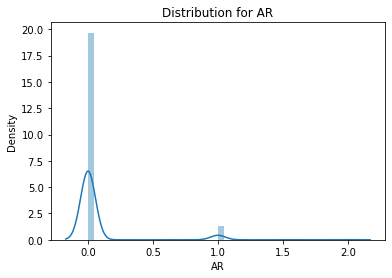

In [ ]:
for col in df.select_dtypes('number').columns:
    sns.distplot(df[col])
    plt.title(f"Distribution for {col}")
    plt.show()

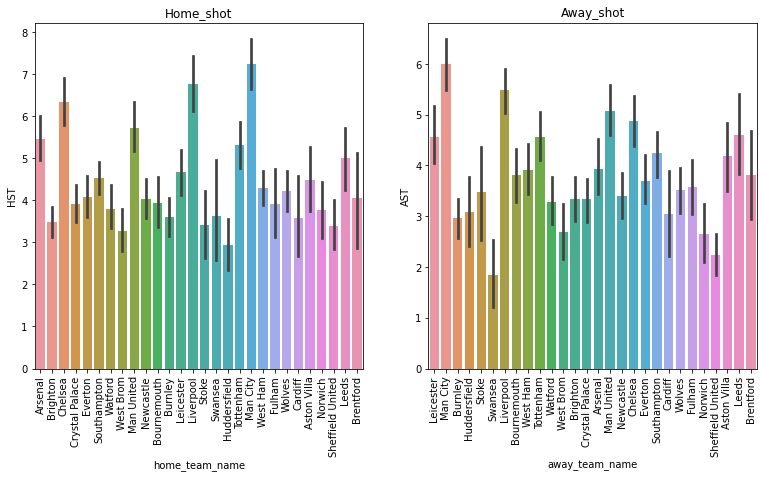

In [ ]:
from pandas.core.groupby import DataFrameGroupBy
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.barplot(x='home_team_name',y='HST',data=df).set_title('Home_shot')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='away_team_name',y='AST',data=df).set_title('Away_shot')
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text major ticklabel objects>)

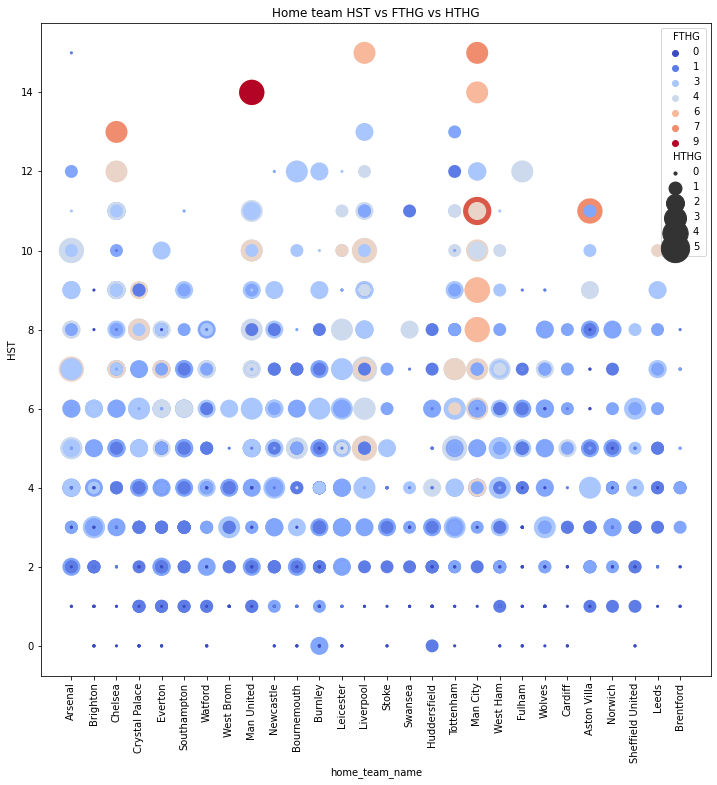

In [ ]:
plt.subplots(figsize=(12, 12))
sns.scatterplot(x="home_team_name", y="HST",
                hue="FTHG", size="HTHG",
                palette="coolwarm",
                sizes=(10, 800), linewidth=0,
                data=df).set_title("Home team HST vs FTHG vs HTHG")
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 <a list of 28 Text major ticklabel objects>)

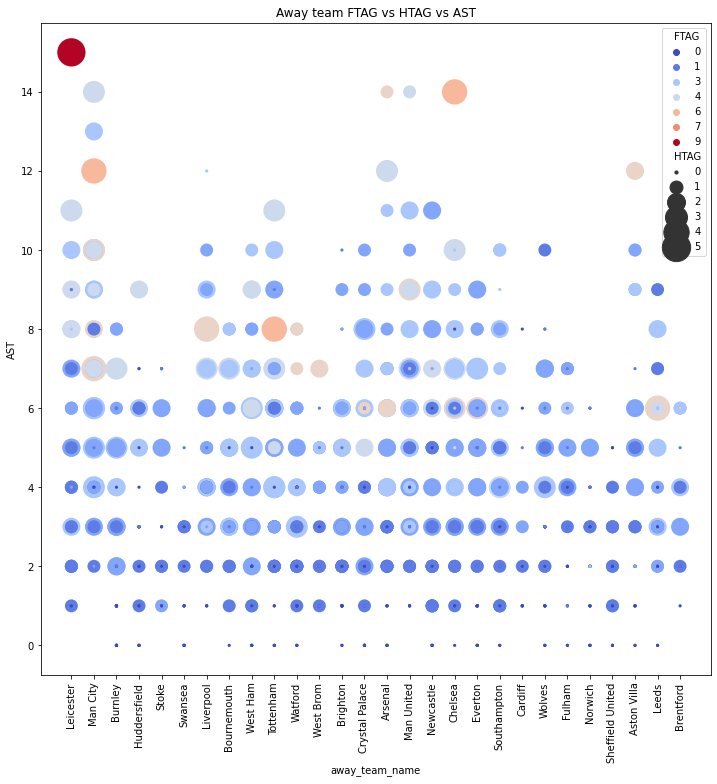

In [ ]:
plt.subplots(figsize=(12, 12))
sns.scatterplot(x="away_team_name", y="AST",
                hue="FTAG", size="HTAG",
                palette="coolwarm",
                sizes=(10, 800), linewidth=0,
                data=df).set_title("Away team FTAG vs HTAG vs AST")
plt.xticks(rotation=90)

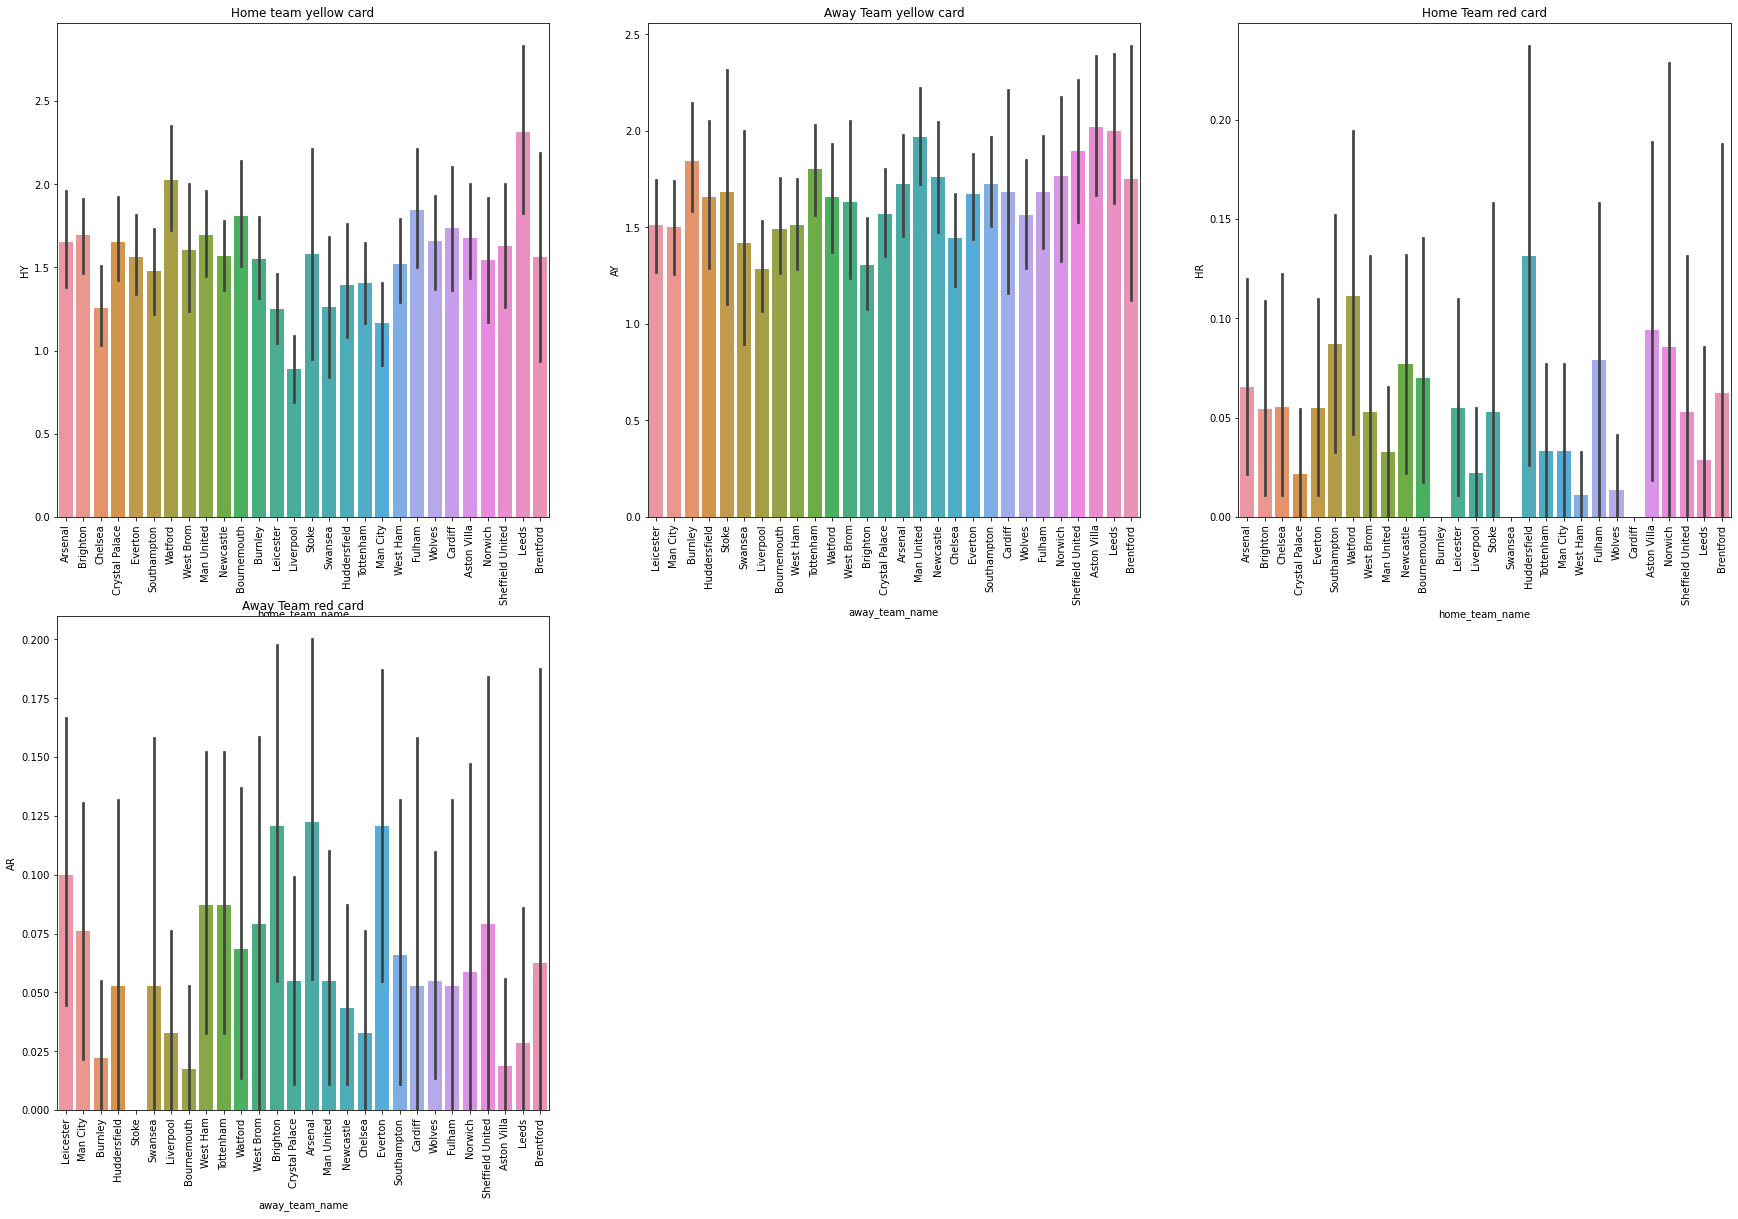

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.barplot(x='home_team_name',y='HY',data=df).set_title('Home team yellow card')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='away_team_name',y='AY',data=df).set_title('Away Team yellow card')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='home_team_name',y='HR',data=df).set_title('Home Team red card')
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.barplot(x='away_team_name',y='AR',data=df).set_title('Away Team red card')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Home team with maximum shots
df.loc[df['HST'].idxmax()]


Season                         2017-18
DateTime          2017-12-02T00:00:00Z
home_team_name                 Arsenal
away_team_name              Man United
FTHG                                 1
FTAG                                 3
FTR                                  A
HTHG                                 0
HTAG                                 2
HTR                                  A
HS                                  33
AS                                   8
HST                                 15
AST                                  4
HC                                  12
AC                                   1
HF                                  11
AF                                  10
HY                                   3
AY                                   2
HR                                   0
AR                                   1
Name: 140, dtype: object

In [ ]:
#AWay team with maximum shots
df.loc[df['AST'].idxmax()]

Season                         2019-20
DateTime          2019-10-25T20:00:00Z
home_team_name             Southampton
away_team_name               Leicester
FTHG                                 0
FTAG                                 9
FTR                                  A
HTHG                                 0
HTAG                                 5
HTR                                  A
HS                                   6
AS                                  25
HST                                  3
AST                                 15
HC                                   2
AC                                   7
HF                                   3
AF                                  12
HY                                   0
AY                                   0
HR                                   1
AR                                   0
Name: 850, dtype: object

In [ ]:
print(df['FTR'].value_counts()['A'])
print(df['FTR'].value_counts()['D'])
print(df['FTR'].value_counts()['H'])

612
417
800


##Exploratory Analysis And Visulaization
-analyze only attributes that is useful information and dropped others that is not significant


Feature Selection

In [ ]:
X = df.drop(['Season','DateTime','home_team_name','away_team_name',
             'FTR','FTHG','FTAG','HTHG','HTAG','HTR'], axis = 1) #feature matrix
y= df['FTR'] #target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
X_train.shape, X_test.shape

((1463, 12), (366, 12))

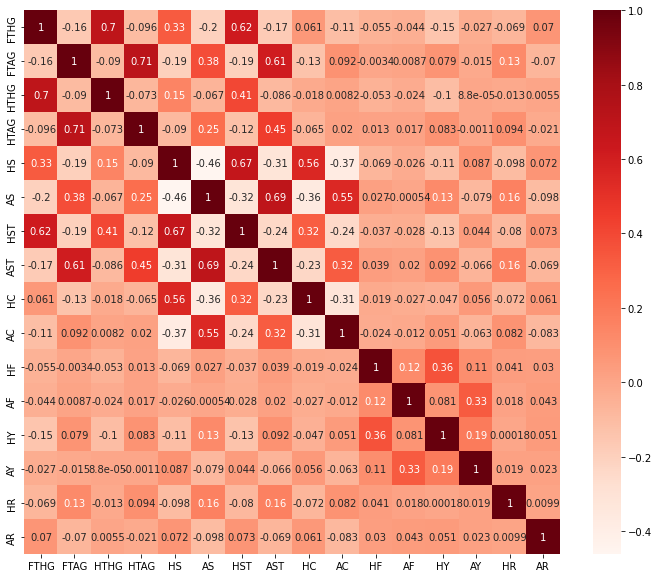

          FTHG      FTAG      HTHG      HTAG        HS        AS       HST  \
FTHG  1.000000 -0.160833  0.697122 -0.095593  0.328985 -0.203026  0.618770   
FTAG -0.160833  1.000000 -0.090266  0.714064 -0.194147  0.381333 -0.192813   
HTHG  0.697122 -0.090266  1.000000 -0.073129  0.150847 -0.066597  0.405657   
HTAG -0.095593  0.714064 -0.073129  1.000000 -0.089750  0.250322 -0.120959   
HS    0.328985 -0.194147  0.150847 -0.089750  1.000000 -0.460677  0.669353   
AS   -0.203026  0.381333 -0.066597  0.250322 -0.460677  1.000000 -0.315718   
HST   0.618770 -0.192813  0.405657 -0.120959  0.669353 -0.315718  1.000000   
AST  -0.174000  0.612665 -0.086053  0.447425 -0.314318  0.694392 -0.236956   
HC    0.061192 -0.132672 -0.018096 -0.064731  0.560342 -0.358725  0.319110   
AC   -0.112222  0.091761  0.008180  0.020074 -0.371959  0.553101 -0.238361   
HF   -0.055326 -0.003384 -0.052517  0.012951 -0.069244  0.026502 -0.037099   
AF   -0.043714  0.008719 -0.023728  0.016608 -0.025502 -0.000541

In [ ]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()
print(cor)

In [ ]:
#coorelation with output variable
cor_target = cor["HS"]
#selecting higly correlated features
relevant_features= cor_target[cor_target>0.5]
relevant_features

HS     1.000000
HST    0.669353
HC     0.560342
Name: HS, dtype: float64

In [ ]:
print(df[["HS","HST"]].corr())

           HS       HST
HS   1.000000  0.669353
HST  0.669353  1.000000


In [ ]:
#coorelation with output variable
cor_target = cor["AS"]
#selecting higly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

AS     1.000000
AST    0.694392
AC     0.553101
Name: AS, dtype: float64

In [ ]:
print(df[["AS","AST"]].corr())

           AS       AST
AS   1.000000  0.694392
AST  0.694392  1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85,random_state=22)
# y_train
# X_test

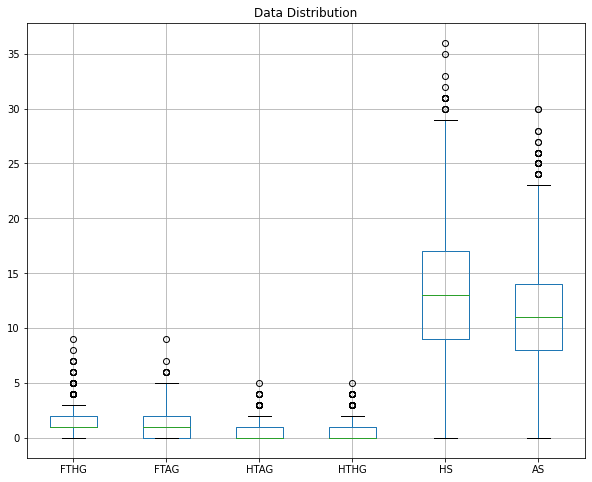

In [ ]:
plt.figure(figsize=(10, 8))

box_pt = df.boxplot(column = ['FTHG','FTAG','HTAG','HTHG','HS','AS'])
plt.title('Data Distribution')
box_pt.plot()
plt.show()

In [ ]:
#after model fitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85,random_state=22)
# y_train
# X_test
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
def classifiers_score(name,var):
  print(name,"score  is:",var)
def precision_score(name,var1):
  print(name,"precision score  is:",var1)

DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', splitter='best',
                       max_depth=None, min_samples_split=2, min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=35,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=35)

In [ ]:
# dt_score=dt.score(X_train,y_train)
# classifiers_score("Decision Tree classifier",dt_score)

In [ ]:
# dt_precisionscore = precision_score(y_test,dt.predict(X_test))
# precision_score("Decision Tree classifier",dt_precisionscore)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, dt.predict(X_test))
print(confusion_matrix)

[[47 21 28]
 [17 18 24]
 [27 21 72]]


Confusion Martix of Decision Tree Classifier


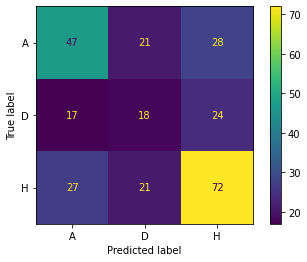

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A','D','H'])
print('Confusion Martix of Decision Tree Classifier')
cm_display.plot()


In [ ]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           A       0.52      0.49      0.50        96
           D       0.30      0.31      0.30        59
           H       0.58      0.60      0.59       120

    accuracy                           0.50       275
   macro avg       0.47      0.46      0.47       275
weighted avg       0.50      0.50      0.50       275



In [ ]:
tp=confusion_matrix[0][0]
fn=confusion_matrix[0][1]+confusion_matrix[0][2]
fp=confusion_matrix[1][0]+confusion_matrix[2][0]
tn=confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

In [ ]:
Precision_score=(tp/(tp+fp))
print("Precision-score for Decision Treee classifier is",Precision_score)
Recall_score=(tp/(tp+fn))
print("Recall-score for Decision Treee classifier is",Recall_score)
f1_score= 2 /((1/Recall_score)+(1/Precision_score))
print("F1-score for Decision Treee classifier is",f1_score)

Precision-score for Decision Treee classifier is 0.5164835164835165
Recall-score for Decision Treee classifier is 0.4895833333333333
F1-score for Decision Treee classifier is 0.5026737967914439


In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini',
                            max_depth=None, min_samples_split=2, min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                            n_jobs=None, random_state=35, verbose=0, warm_start=False,
                            class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', random_state=35)

In [ ]:
rf_score=rf.score(X_train,y_train)
classifiers_score("Random forest classifier",rf_score)

Random forest classifier score  is: 1.0


In [ ]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
print(confusion_matrix)

[[60 11 25]
 [22  5 32]
 [21  7 92]]


Confusion Martix of random forest classifier is


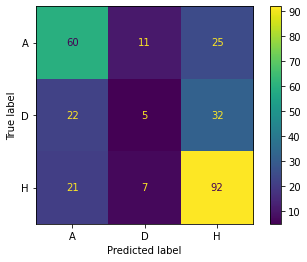

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A','D','H'])
print('Confusion Martix of random forest classifier is')
cm_display.plot()

In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           A       0.58      0.62      0.60        96
           D       0.22      0.08      0.12        59
           H       0.62      0.77      0.68       120

    accuracy                           0.57       275
   macro avg       0.47      0.49      0.47       275
weighted avg       0.52      0.57      0.54       275



In [ ]:
tprf=confusion_matrix[0][0]
fnrf=confusion_matrix[0][1]+confusion_matrix[0][2]
fprf=confusion_matrix[1][0]+confusion_matrix[2][0]
tnrf=confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

In [ ]:
Precision_score_rf=(tprf/(tprf+fprf))
print("Precision-score for random forest classifier is",Precision_score_rf)
Recall_score_rf=(tprf/(tprf+fnrf))
print("Recall-score for random forest classifier is",Recall_score_rf)
f1_score_rf= 2 / ((1/Recall_score_rf)+(1/Precision_score_rf))
print("F1-score for random forest classifier is",f1_score_rf)

Precision-score for random forest classifier is 0.5825242718446602
Recall-score for random forest classifier is 0.625
F1-score for random forest classifier is 0.6030150753768844


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgB =  GradientBoostingClassifier( loss='deviance', learning_rate=0.01, n_estimators=100,
                                    subsample=1.0, criterion='friedman_mse',
                                    min_samples_split=2, min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_depth=5, min_impurity_decrease=0.0, init=None,
                                    random_state=35,
                                    max_features=7, verbose=0,
                                    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
                                    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
xgB.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=7,
                           random_state=35)

In [ ]:
xgB_score=xgB.score(X_train,y_train)
classifiers_score("Gradient BOOSTING classifier",xgB_score)

Gradient BOOSTING classifier score  is: 0.6898326898326899


In [ ]:
xgB_trainscore=xgB.score(X_train,y_train)
classifiers_score("Gradient boosting classifier score for train data is ",xgB_trainscore)

Gradient boosting classifier score for train data is  score  is: 0.6898326898326899


In [ ]:
xgB_testscore= xgB.score(X_test,y_test)
classifiers_score("Gradient boosting classifier score for test data is",xgB_testscore)

Gradient boosting classifier score for test data is score  is: 0.5963636363636363


In [ ]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, xgB.predict(X_test))
print(confusion_matrix)

[[ 57   1  38]
 [ 16   3  40]
 [ 16   0 104]]


Confusion Martix GradientBoostingClassifier classifier is


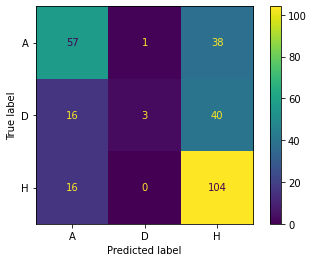

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A','D','H'])
print('Confusion Martix GradientBoostingClassifier classifier is')
cm_display.plot()

In [ ]:
print(classification_report(y_test, xgB.predict(X_test)))

              precision    recall  f1-score   support

           A       0.64      0.59      0.62        96
           D       0.75      0.05      0.10        59
           H       0.57      0.87      0.69       120

    accuracy                           0.60       275
   macro avg       0.65      0.50      0.47       275
weighted avg       0.63      0.60      0.54       275



In [ ]:
tpxgB=confusion_matrix[0][0]
fnxgB=confusion_matrix[0][1]+confusion_matrix[0][2]
fpxgB=confusion_matrix[1][0]+confusion_matrix[2][0]
tnxgB=confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

In [ ]:
Precision_score_xgB=(tpxgB/(tpxgB+fpxgB))
print("Precision-score for GradientBoostingClassifier is",Precision_score_xgB)
Recall_score_xgB=(tpxgB/(tpxgB+fnxgB))
print("Recall-score for GradientBoostingClassifier is",Recall_score_xgB)
f1_score_xgB= 2 / ((1/Recall_score_xgB)+(1/Precision_score_xgB))
print("F1-score for GradientBoostingClassifier is",f1_score_xgB)

Precision-score for GradientBoostingClassifier is 0.6404494382022472
Recall-score for GradientBoostingClassifier is 0.59375
F1-score for GradientBoostingClassifier is 0.6162162162162163


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada =  AdaBoostClassifier(n_estimators=50,
                   learning_rate=0.1, algorithm='SAMME.R',
                   random_state=35)
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, random_state=35)

In [ ]:
ada_score=ada.score(X_train,y_train)
classifiers_score("ADA classifier test data ",ada_score)

ADA classifier test data  score  is: 0.5984555984555985


In [ ]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
print(confusion_matrix)

[[57  2 37]
 [23  1 35]
 [21  1 98]]


Confusion Martix of ADA boost classifier is


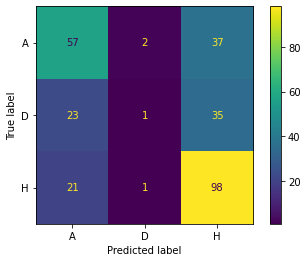

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['A','D','H'])
print('Confusion Martix of ADA boost classifier is')
cm_display.plot()

In [ ]:
print(classification_report(y_test, ada.predict(X_test)))

              precision    recall  f1-score   support

           A       0.56      0.59      0.58        96
           D       0.25      0.02      0.03        59
           H       0.58      0.82      0.68       120

    accuracy                           0.57       275
   macro avg       0.46      0.48      0.43       275
weighted avg       0.50      0.57      0.50       275



In [ ]:
tpada=confusion_matrix[0][0]
fnada=confusion_matrix[0][1]+confusion_matrix[0][2]
fpada=confusion_matrix[1][0]+confusion_matrix[2][0]
tnada=confusion_matrix[1][1]+confusion_matrix[1][2]+confusion_matrix[2][1]+confusion_matrix[2][2]

In [ ]:
Precision_score_ada=(tpada/(tpada+fpada))
print("Precision-score for ADA Booster Classifier is",Precision_score_ada)
Recall_score_ada=(tpada/(tpada+fnada))
print("Recall-score for ADA booster classifier is",Recall_score_ada)
f1_score_ada= 2 / ((1/Recall_score_ada)+(1/Precision_score_ada))
print("F1-score for ADA booster classifier  is",f1_score_ada)

Precision-score for ADA Booster Classifier is 0.5643564356435643
Recall-score for ADA booster classifier is 0.59375
F1-score for ADA booster classifier  is 0.5786802030456852


In [ ]:
accuracy_decisiontree=accuracy_score(y_test, dt.predict(X_test))*100
print("Accuracy of Decision Tree : ",accuracy_decisiontree)
accuracy_randomforest=accuracy_score(y_test, rf.predict(X_test))*100
print("Accuracy of Random Forest : ",accuracy_randomforest)
accuracy_adapt=accuracy_score(y_test, ada.predict(X_test))*100
print("Accuracy of Adaptive Boosting: ",accuracy_adapt)
accuracy_xgB=accuracy_score(y_test, xgB.predict(X_test))*100
print("Accuracy of Gradient Boosting: ",accuracy_xgB)

Accuracy of Decision Tree :  49.81818181818182
Accuracy of Random Forest :  57.09090909090909
Accuracy of Adaptive Boosting:  56.72727272727273
Accuracy of Gradient Boosting:  59.63636363636363


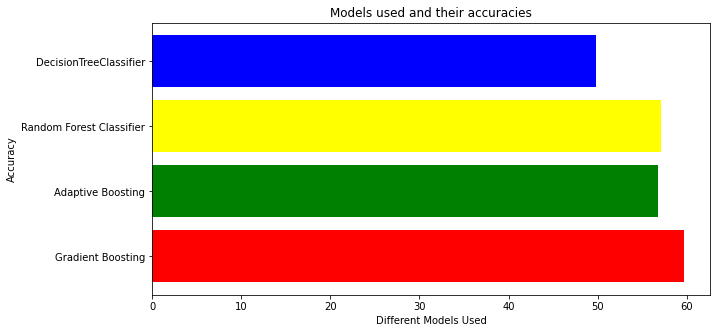

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))
model_name=["Gradient Boosting","Adaptive Boosting","Random Forest Classifier","DecisionTreeClassifier",]
accuracy=[accuracy_xgB,accuracy_adapt,accuracy_randomforest,accuracy_decisiontree]
color =["red","green","yellow","blue"]
plt.barh(model_name,accuracy,color=color)
plt.xlabel("Different Models Used")
plt.ylabel("Accuracy")
plt.title("Models used and their accuracies")
plt.show()

In [ ]:
import scikitplot as skplt

In [ ]:
y_dt = dt.predict_proba(X_test)
y_rf = rf.predict_proba(X_test)
y_ada = ada.predict_proba(X_test)
y_xgb = xgB.predict_proba(X_test)

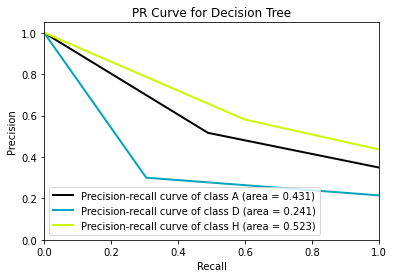

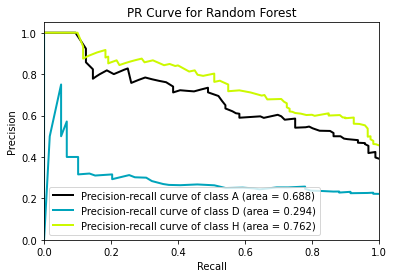

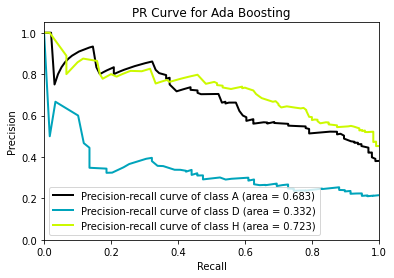

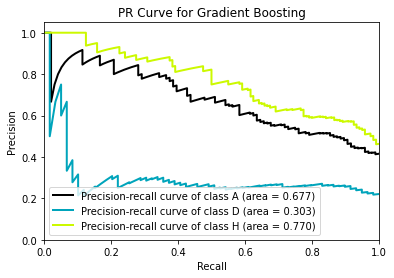

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_dt,
                                    title = 'PR Curve for Decision Tree',plot_micro=False)
skplt.metrics.plot_precision_recall(y_test, y_rf,
                                    title = 'PR Curve for Random Forest',plot_micro=False)
skplt.metrics.plot_precision_recall(y_test, y_ada,
                                    title = 'PR Curve for Ada Boosting',plot_micro=False)
skplt.metrics.plot_precision_recall(y_test, y_xgb,
                                    title = 'PR Curve for Gradient Boosting',plot_micro=False)